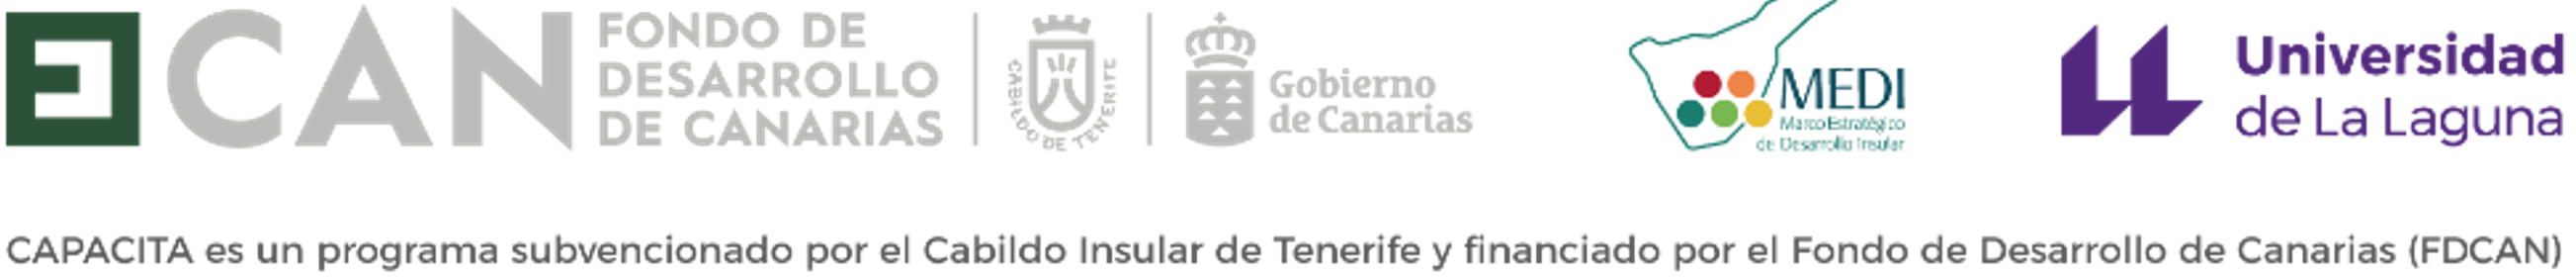

El primer paso a realizar son cargarlos datos, usaremos un grafo de musicos de [Jazz creado por P.Gleiser y L. Danon (Adv. Complex Syst.6, 565 (2003))](https://gephi.org/datasets/jazz.net.zip).

Cargamos el fichero en Gephi para obtener nuestros datos en formato CSV. Una vez cargado, vamos a laboratorio de datos, en la tabla de aristas y la exportamos.

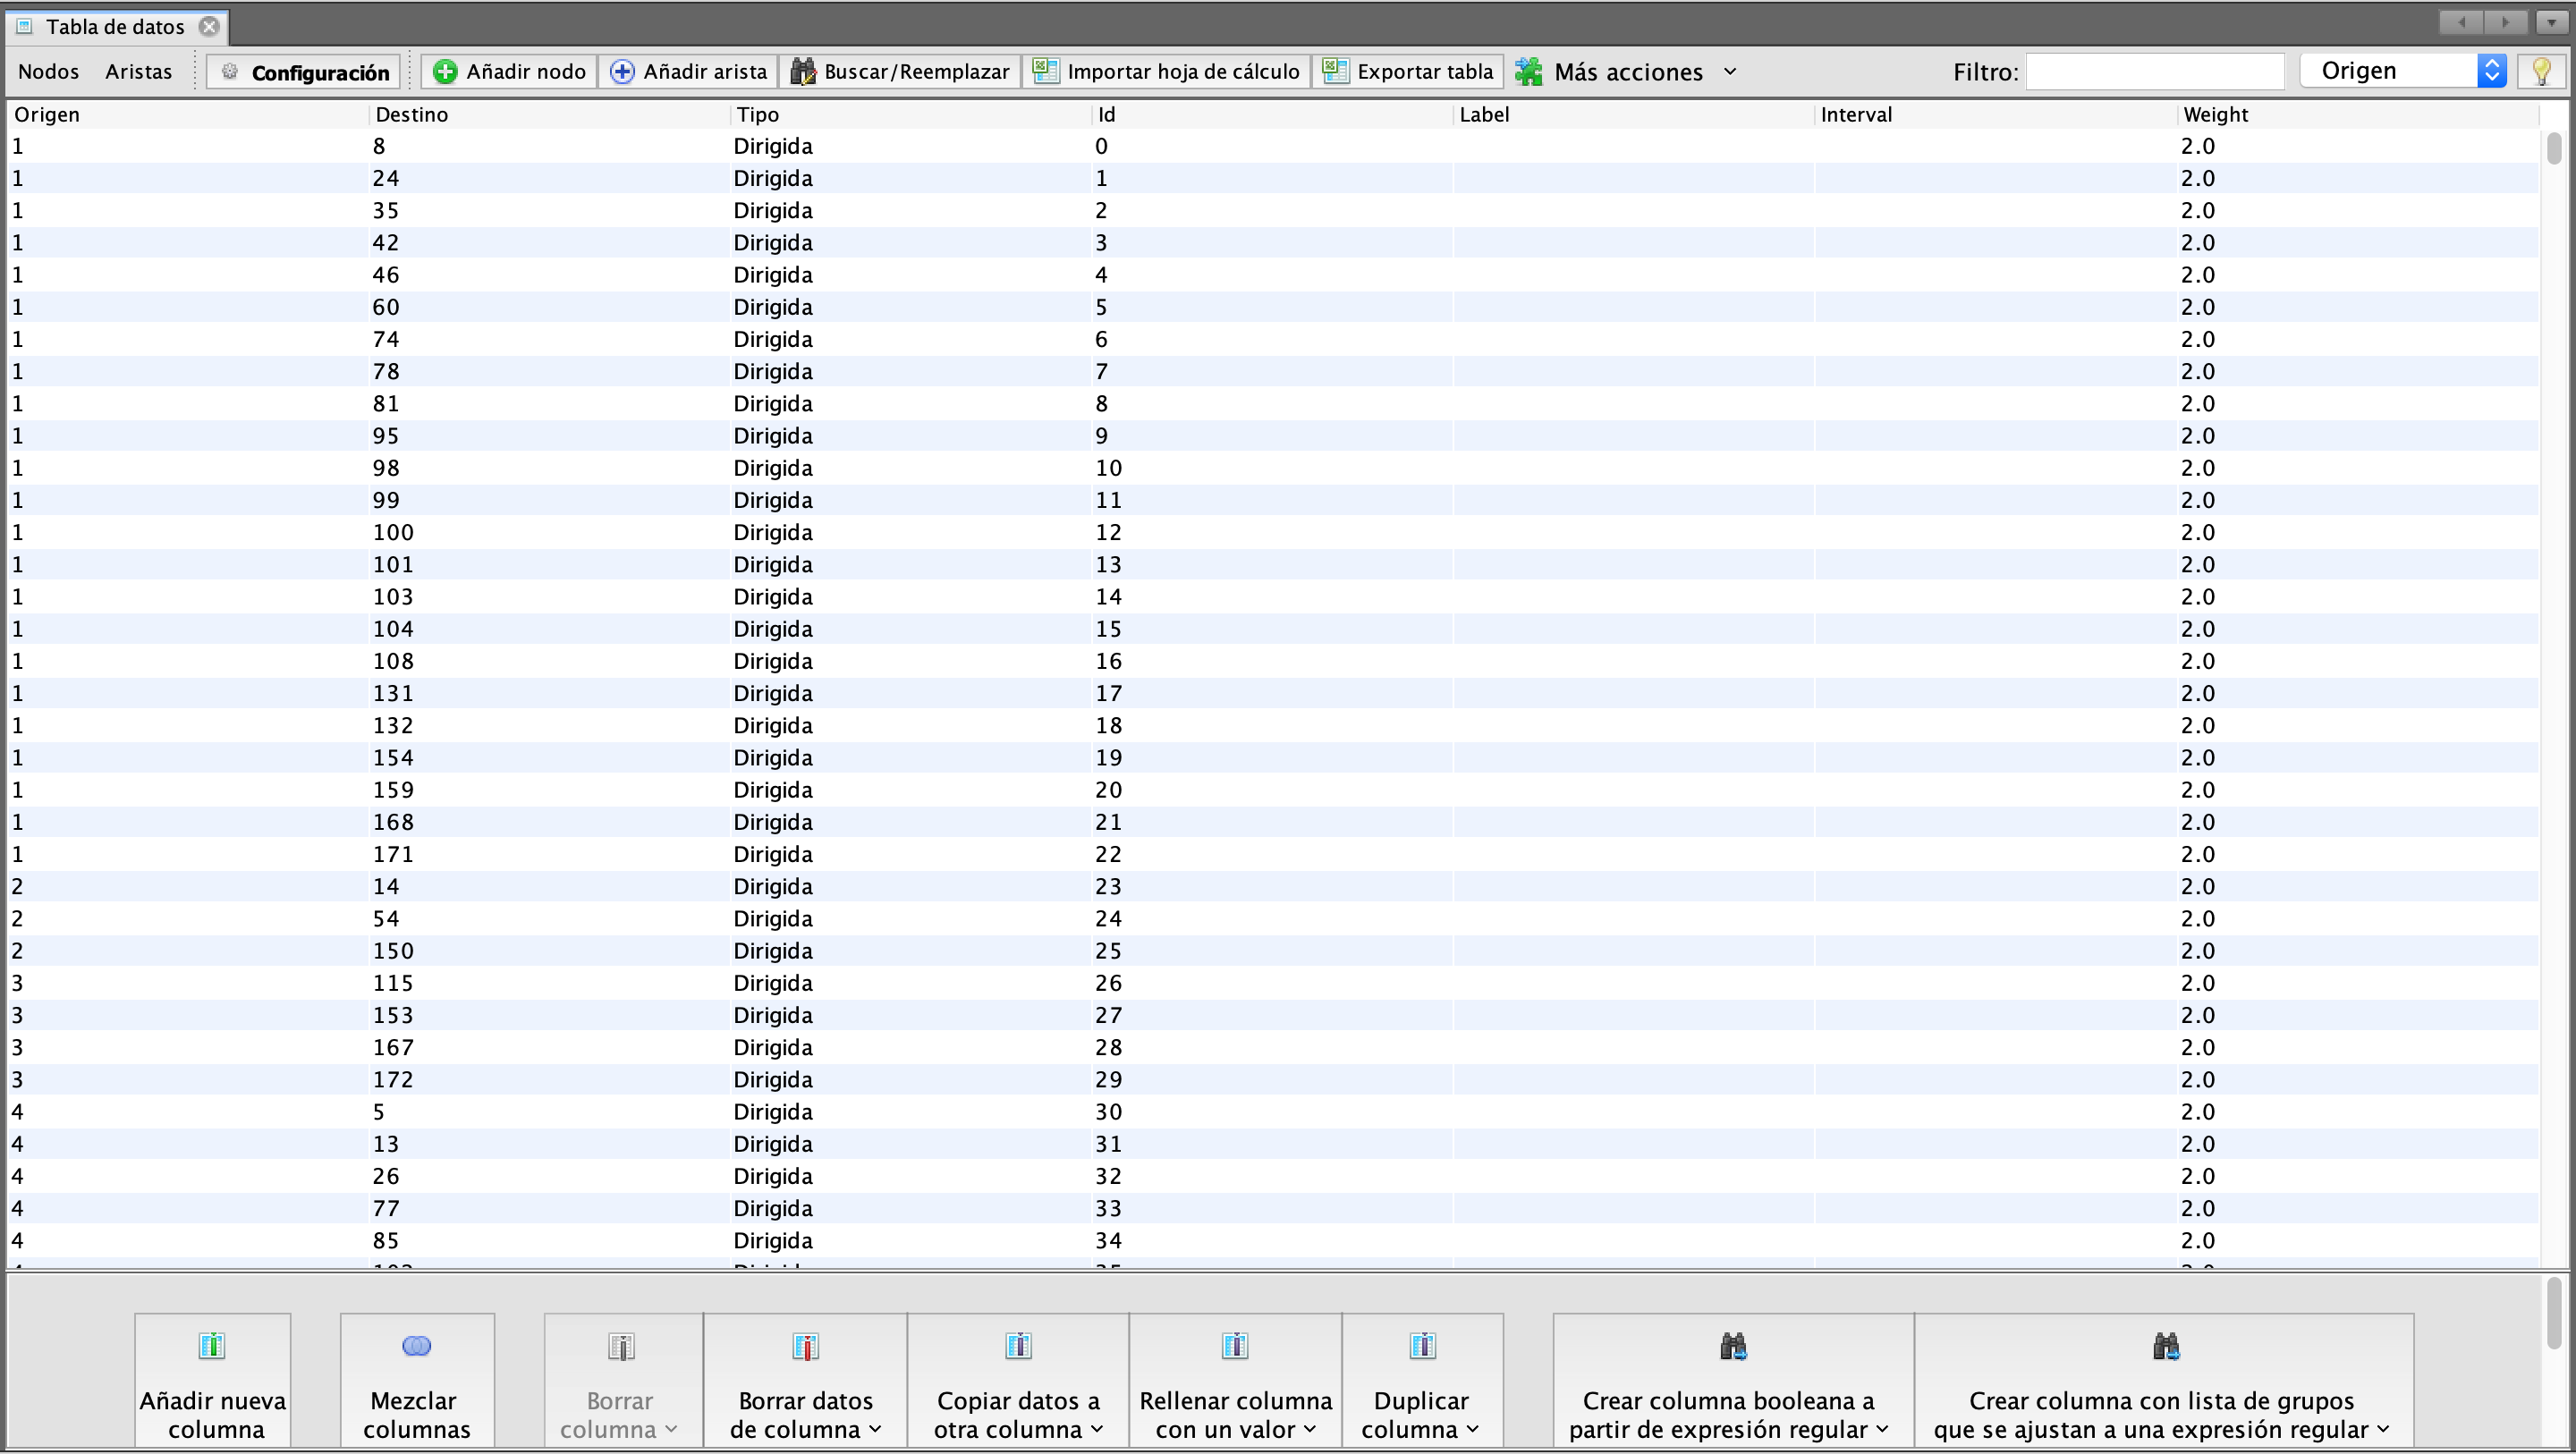

Abrimos el fichero con cualquier aplicación de cálculo como *Numbers* o *Calc* y eliminamos las columnas quedandonos solamente con la *Source*, *Target* y *Weight*.

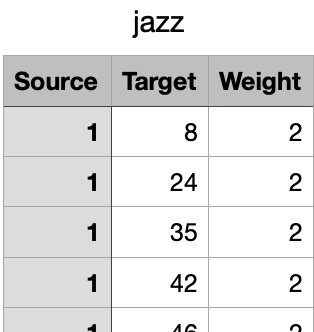

Y subimos el fichero a nuestro Google Colab, es importante ponerlo dentro de la carpeta */content/sample_data* que es donde se cargará.

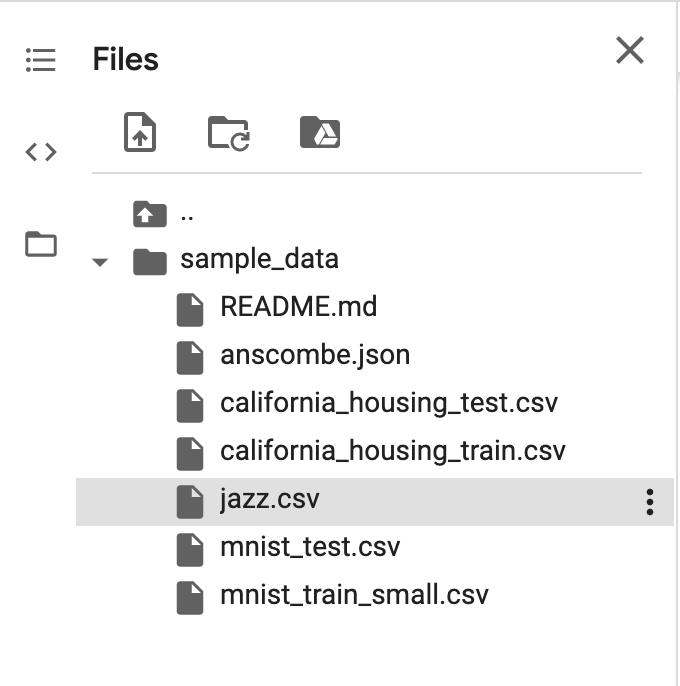

Importamos las librerías que vamos a usar.

In [2]:
import csv
import networkx as nx

from networkx.algorithms.community import *

Nos desplazamos a la carpeta donde se encuentra nuestro dataset.

In [3]:
cd /content/sample_data

/content/sample_data


Mostramos el contenido de la carpeta para asegurarnos que está nuestro fichero.

In [4]:
ls


anscombe.json*                jazz.csv               README.md*
california_housing_test.csv   mnist_test.csv
california_housing_train.csv  mnist_train_small.csv


Cargamos el fichero y lo mostramos.

In [5]:
data  = open('jazz.csv', "r")

Graphtype = nx.Graph()
next(data, None)
Graphtype = nx.Graph()

g = nx.read_edgelist(data, delimiter=';', create_using=nx.Graph(), nodetype=int, data=(('weight', int),))

Nodes:  198
Edges:  2742


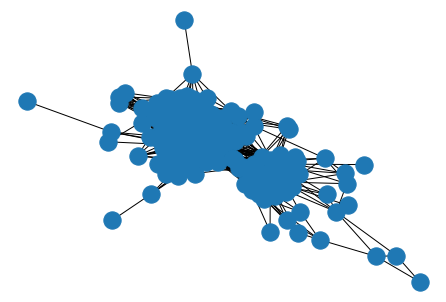

In [6]:
print("Nodes: ", len(g.nodes))
print("Edges: ", len(g.edges))
nx.draw(g)

Ejecutamos de nuevo nuestra función para poder colorear los clusters.

In [7]:
def createColoursFromNetworkX(g, clusters):
  newClusters = {}
  
  for node in g:
    for clusterID in range(len(clusters)):
      if node in clusters[clusterID]:
        newClusters[node] = clusterID
        
  colours = [newClusters[node] for node in newClusters]
  
  return colours

Y a partir de aquí ejecutamos algunos de los algoritmos definidos en la práctica anterior.

#### Girvan-Newman

In [8]:
communities_generator = girvan_newman(g)

top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)

clusters = sorted(map(sorted, next_level_communities))
print("# cluster: ", len(clusters))

# cluster:  3


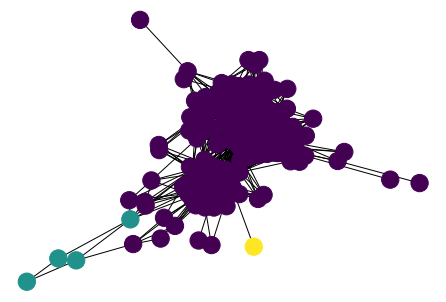

In [9]:
colours = createColoursFromNetworkX(g, clusters)
nx.draw(g, node_color=colours)

#### Cliques

In [12]:
cliques = list(nx.find_cliques(g))
print("Cliques:", len(cliques))

Cliques: 746


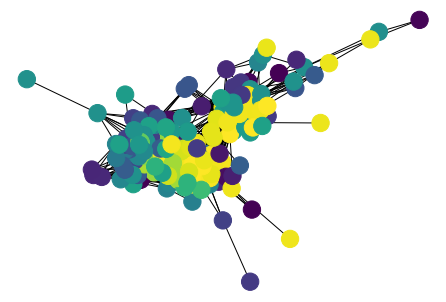

In [13]:
colours = createColoursFromNetworkX(g, cliques)
nx.draw(g, node_color=colours)

Creamos nuestra matriz de adyacencia.

In [14]:
adj = nx.adjacency_matrix(g)
adj = adj.todense();
adj

matrix([[0, 2, 2, ..., 0, 0, 0],
        [2, 0, 0, ..., 0, 0, 0],
        [2, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
from sklearn import cluster

Código para definir los colores desde los cluster formados por la librería _sklearn_:

In [16]:
def createColoursFromSklearn(g, clusters):
  colours = [clusters[node - 1] for node in g]
  
  return colours
  


#### K-means

In [19]:
number_of_clusters = 5

kmeans = cluster.KMeans(n_clusters=number_of_clusters, n_init=200)
kmeans.fit(adj)

resultKMeans = list(kmeans.labels_)
resultKMeans

[4,
 4,
 4,
 1,
 4,
 4,
 1,
 4,
 4,
 3,
 0,
 1,
 1,
 1,
 1,
 4,
 4,
 1,
 1,
 1,
 1,
 4,
 1,
 0,
 4,
 3,
 3,
 3,
 4,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 4,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 4,
 4,
 4,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 3,
 4,
 3,
 3,
 0,
 0,
 0,
 3,
 4,
 3,
 1,
 0,
 3,
 3,
 0,
 0,
 0,
 0,
 3,
 3,
 3,
 3,
 0,
 3,
 4,
 0,
 0,
 0,
 3,
 4,
 1,
 0,
 0,
 0,
 0,
 4,
 4,
 1,
 4,
 4,
 4,
 4,
 1,
 4,
 4,
 4,
 1,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 1,
 1,
 4,
 1,
 4,
 2,
 0,
 2,
 4,
 4,
 4,
 4,
 2,
 4,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 4,
 4,
 4,
 4]

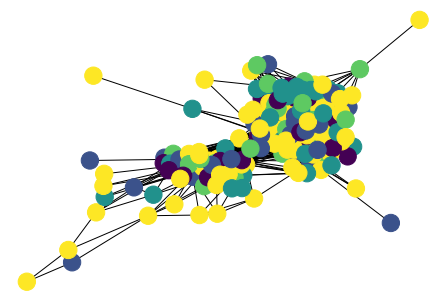

In [20]:
colours = createColoursFromSklearn(g, resultKMeans)
nx.draw(g, node_color=colours)

#### Clustering agglomerativo

In [21]:
number_of_clusters = 4

agglomerative = cluster.AgglomerativeClustering(n_clusters=number_of_clusters, linkage="ward")
agglomerative.fit(adj)

resultAgglomerative = list(agglomerative.labels_)
resultAgglomerative

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


[3,
 3,
 3,
 1,
 3,
 3,
 1,
 0,
 3,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 3,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 3,
 0,
 0,
 0,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 3,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 3,
 2,
 0,
 0,
 0,
 3,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 1,
 0,
 0,
 0,
 3,
 3,
 3,
 0,
 3,
 3,
 3,
 3,
 1,
 1,
 3,
 1,
 0,
 0,
 0,
 2,
 3,
 0,
 0,
 0,
 2,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 3,
 3,
 3,
 3]

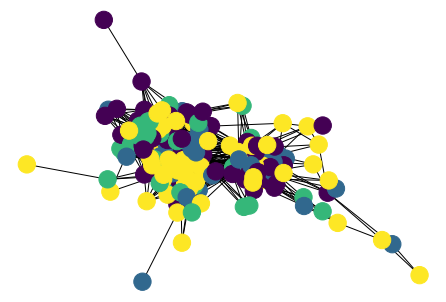

In [22]:
colours = createColoursFromSklearn(g, resultAgglomerative)
nx.draw(g, node_color=colours)